In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.io import output_file, show
from bokeh.plotting import figure

%matplotlib inline

In [4]:
df =  pd.read_csv("events.csv", low_memory=False)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011288 entries, 0 to 1011287
Data columns (total 23 columns):
timestamp                   1011288 non-null object
event                       1011288 non-null object
person                      1011288 non-null object
url                         82756 non-null object
sku                         563838 non-null object
model                       564284 non-null object
condition                   563836 non-null object
storage                     563836 non-null object
color                       563836 non-null object
skus                        221699 non-null object
search_term                 48967 non-null object
staticpage                  3598 non-null object
campaign_source             82796 non-null object
search_engine               50957 non-null object
channel                     87378 non-null object
new_vs_returning            87378 non-null object
city                        87378 non-null object
region                    

## Porcentaje de personas que compraron de los que hicieron algun evento

In [6]:
comrpo1 = df.groupby('person').agg({'event':lambda x: 'conversion' in list(x)})

In [7]:
compro2 = df.groupby('person').agg({'event':lambda x: 'conversion' in x.unique()})

In [59]:
compro2['event'].value_counts().to_frame()

,event
False,26908
True,716


In [98]:
p = compro2['event'].value_counts().to_frame()
p['porcentaje'] = round(p['event']/p['event'].sum() * 100,2)
p.index=['No compró','Compró']
p=p.reset_index()

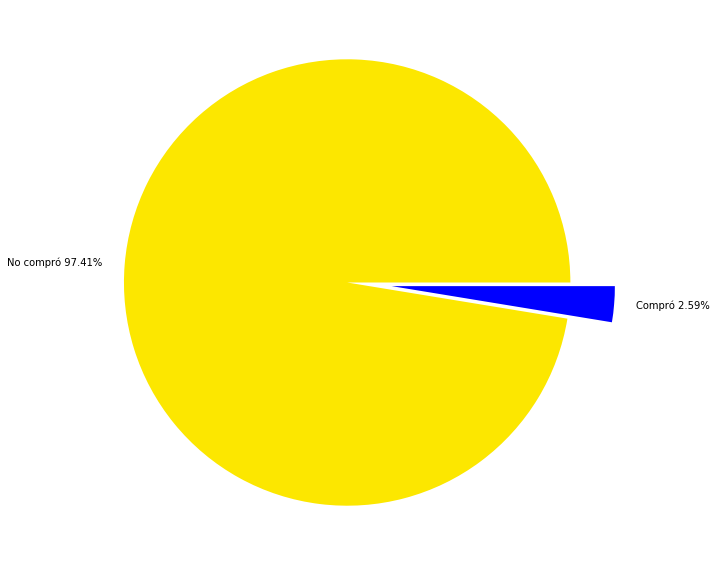

In [101]:
fig1,ax1 = plt.subplots()
ax1.axis('equal')
fig1.set_size_inches(10,10)

ax1.pie(p['porcentaje'],labels=p['index']+' '+(p['porcentaje']).astype(str)+'%',explode=(0,0.2),colors=['#fce700','#0000ff'])
plt.show()
